In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:

file = '../../Downloads/Iris.csv'

df = pd.read_csv(file) 
df.head()
 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:

Y = df['species']
lab_enc = LabelEncoder()
Y = lab_enc.fit_transform(Y)   # converting categorical variables into numerical

features = [s for s in df.columns if df[s].dtype != object]
x = df[features] 
               

In [4]:
def calculate_training_loss(train_sz):
    X_train, X_test, y_train, y_test = train_test_split(x, Y, train_size=train_sz, test_size=1-train_sz,random_state=0)
    model = XGBClassifier(eval_metric=["mlogloss"] )
    eval_set = [(X_train, y_train),(X_test, y_test)]
    model.fit(X_train, y_train, eval_set=eval_set, verbose=False)
    results = model.evals_result()
    epochs = len(results["validation_0"]["mlogloss"])
    
    return ([results["validation_0"]["mlogloss"][epochs - 1],results["validation_1"]["mlogloss"][epochs - 1]])

In [5]:
train_loss = []
test_loss = []
partition_sz = np.arange(0.5,0.95,0.05)
for i in partition_sz:
    train_loss.append(calculate_training_loss(i)[0])    # calculating training loss for given partition size
    test_loss.append(calculate_training_loss(i)[1])    # calculating testing loss for given partition size
    

In [6]:
print(train_loss,test_loss)

[0.02177352458859484, 0.02074384768266322, 0.01900417854388555, 0.01740938526237403, 0.0163025126249219, 0.01547629796966378, 0.01782644679866886, 0.01655330924467572, 0.01562124606118434] [0.16042728989074628, 0.19956973903155065, 0.21400329591706396, 0.13160230579153406, 0.14008886218847086, 0.15748841725412363, 0.01725563924216355, 0.04935371230417133, 0.02987517204601318]


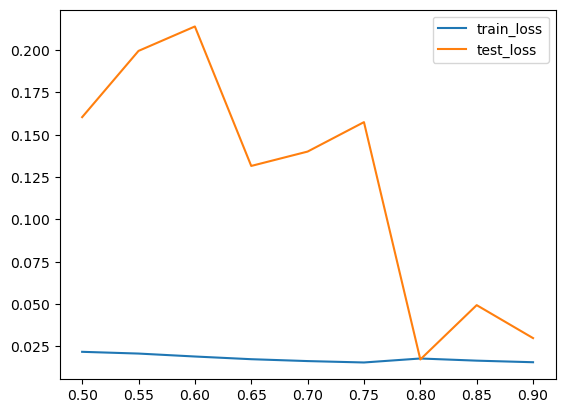

In [7]:

plt.plot(partition_sz,train_loss)
plt.plot(partition_sz,test_loss)
plt.legend(["train_loss","test_loss"])
plt.show()

## Observation
* Test loss is minimum for partition size = 0.8
